In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Load and Visualize the Electricity Data

In [2]:
# Read the electricity generation data
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m12/lesson_1/datasets/electricity-generation.csv"
df_electricity = pd.read_csv(file_path)

# Display sample data
df_electricity.head()

,Year,Hydro,Thermal,Renewables,Total
0,2000,6610.0,614.0,0,7224
1,2001,6609.0,1250.0,0,7859
2,2002,5036.0,2237.0,0,7273
3,2003,3885.0,1996.0,0,5881
4,2004,5280.0,758.0,0,6038


<Axes: title={'center': 'Total electricity generation by year (GHz)'}, xlabel='Year', ylabel='Total'>

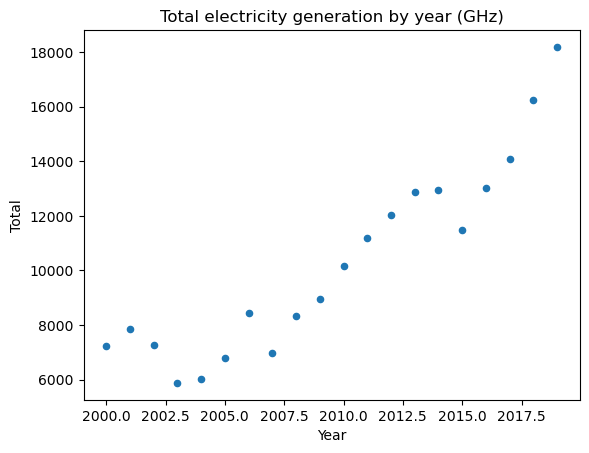

In [3]:
# Create a scatter plot with the total electricity generation by year
electricity_plot = df_electricity.plot.scatter(
    x="Year",
    y="Total",
    title="Total electricity generation by year (GHz)"
)
electricity_plot

In [4]:
# The first three years look like significant outliers.
# Reduce the DataFrame to just the "Year" and "Total" columns
# and only from 2003 onwards

df = pd.DataFrame(df_electricity.loc[df_electricity["Year"]>=2003,["Year","Total"]])\
        .reset_index().drop(columns="index")
df.head()

,Year,Total
0,2003,5881
1,2004,6038
2,2005,6788
3,2006,8430
4,2007,6978


## Prepare the Data to Fit the Linear Regression Model

In [5]:
# Create the X set
X = df["Year"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[2003],
       [2004],
       [2005],
       [2006],
       [2007]])

In [6]:
# Create an array for the dependent variable y with the total electricity generation data
y = df["Total"]

## Build the Linear Regression Model

In [7]:
# Create a model with scikit-learn
model = LinearRegression()

In [8]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [9]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [681.87990196]


In [10]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -1360458.3063725496


In [11]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = -1360458.3063725496 + 681.8799019607845X


## Plot the Best Fit Line for the Electricity Generation Prediction Model

In [12]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [13]:
# Create a copy of the original data
df_electricity_predicted = df.copy()

# Add a column with the predicted electricity values
df_electricity_predicted["electricity_predicted"] = predicted_y_values

# Display sample data
df_electricity_predicted.head()

,Year,Total,electricity_predicted
0,2003,5881,5347.137255
1,2004,6038,6029.017157
2,2005,6788,6710.897059
3,2006,8430,7392.776961
4,2007,6978,8074.656863


<Axes: xlabel='Year'>

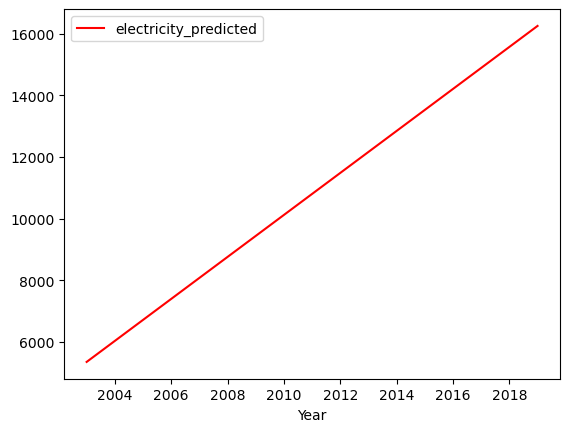

In [14]:
# Create a line plot of the predicted total electricity generation values
best_fit_line = df_electricity_predicted.plot.line(
    x = "Year",
    y = "electricity_predicted",
    color = "red"
)
best_fit_line

<Axes: title={'center': 'Electricity Generation by Year (GHz)'}, xlabel='Year', ylabel='Total'>

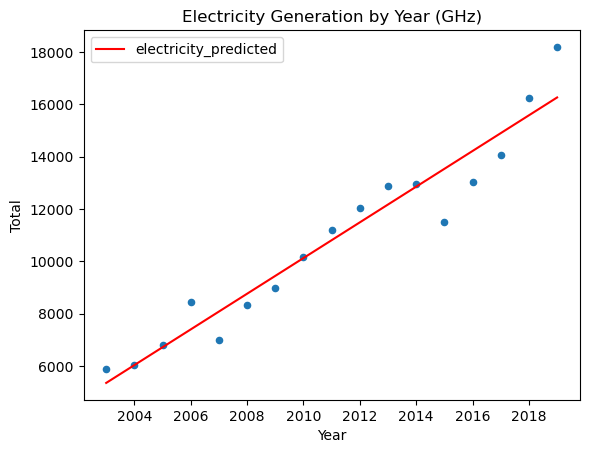

In [15]:
# Superpose the original data and the best fit line
# Create a scatter plot with the electricity information
electricity_plot = df_electricity_predicted.plot.scatter(
    x="Year",
    y="Total",
    title="Electricity Generation by Year (GHz)"
)

# Create a line plot of the predicted total electricity generation values
best_fit_line = df_electricity_predicted.plot.line(
    x = "Year",
    y = "electricity_predicted",
    color = "red",
    ax=electricity_plot
)
electricity_plot

## Make Manual Predictions

In [16]:
# Display the formula to predict the electricity generation for 2023
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 2023")

# Predict the electricity generation for 2023
y_2023 = model.intercept_ + model.coef_[0] * 2023

# Display the prediction
print(f"Predicted electricity generation for 2023: {y_2023:.2f}")

Model's formula: y = -1360458.3063725496 + 681.8799019607845 * 2023
Predicted electricity generation for 2023: 18984.74


## Make Predictions Using the `predict` Function

In [17]:
# Create an array to predict electricity generation for the years 2020, 2021, 2022, and 2023
X_years = np.array([2020, 2021, 2022, 2023])

# Format the array as a one-column array
X_years = X_years.reshape(-1,1)

# Display sample data
X_years

array([[2020],
       [2021],
       [2022],
       [2023]])

In [18]:
# Predict electricity generation for the years 2020, 2021, 2022, and 2023
predicted_electricity = model.predict(X_years)

In [19]:
# Create a DataFrame for the predicted electricity generation
df_predicted_electricity = pd.DataFrame(
    {
        "Year": X_years.reshape(1, -1)[0],
        "predicted_electricity": predicted_electricity
    }
)

# Display data
df_predicted_electricity

,Year,predicted_electricity
0,2020,16939.095588
1,2021,17620.975490
2,2022,18302.855392
3,2023,18984.735294


## Linear Regression Model Assessment

In [20]:
# Import relevant metrics - score, r2, mse, rmse - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Compute the metrics for the linear regression model
score = round(model.score(X, y, sample_weight=None),5)
r2 = round(r2_score(y, predicted_y_values),5)
mse = round(mean_squared_error(y, predicted_y_values),4)
rmse = round(np.sqrt(mse),4)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The score is 0.92953.
The r2 is 0.92953.
The mean squared error is 845942.1521.
The root mean squared error is 919.7511.
